In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
%matplotlib inline

# Chiffre clé COVID 19

In [5]:
chiffre_france = pd.read_csv("Data/chiffres-cles.csv")

chiffre_france["date"] = pd.to_datetime(chiffre_france["date"])

chiffre_france.sort_values("date", inplace=True)

In [6]:
chiffre_france.maille_code.sort_values().unique()

array(['COM-977', 'COM-978', 'DEP-01', 'DEP-02', 'DEP-03', 'DEP-04',
       'DEP-05', 'DEP-06', 'DEP-07', 'DEP-08', 'DEP-10', 'DEP-11',
       'DEP-12', 'DEP-13', 'DEP-14', 'DEP-18', 'DEP-21', 'DEP-22',
       'DEP-24', 'DEP-25', 'DEP-26', 'DEP-27', 'DEP-28', 'DEP-29',
       'DEP-2B', 'DEP-30', 'DEP-31', 'DEP-32', 'DEP-34', 'DEP-35',
       'DEP-36', 'DEP-37', 'DEP-38', 'DEP-39', 'DEP-41', 'DEP-42',
       'DEP-43', 'DEP-44', 'DEP-45', 'DEP-46', 'DEP-48', 'DEP-49',
       'DEP-50', 'DEP-51', 'DEP-52', 'DEP-53', 'DEP-54', 'DEP-55',
       'DEP-56', 'DEP-57', 'DEP-58', 'DEP-59', 'DEP-60', 'DEP-61',
       'DEP-62', 'DEP-63', 'DEP-65', 'DEP-66', 'DEP-67', 'DEP-68',
       'DEP-69', 'DEP-70', 'DEP-71', 'DEP-72', 'DEP-73', 'DEP-74',
       'DEP-75', 'DEP-76', 'DEP-77', 'DEP-78', 'DEP-80', 'DEP-81',
       'DEP-82', 'DEP-83', 'DEP-84', 'DEP-85', 'DEP-88', 'DEP-89',
       'DEP-91', 'DEP-92', 'DEP-93', 'DEP-94', 'DEP-95', 'FRA', 'REG-01',
       'REG-02', 'REG-03', 'REG-04', 'REG-06', 'REG-1

In [7]:
deces = chiffre_france[chiffre_france["maille_nom"] == "France"][[
    "date", "cas_confirmes", "deces"
]]
deces.set_index("date", inplace=True)

deces["ratio"] = deces.deces / deces.cas_confirmes
deces

,cas_confirmes,deces,ratio
date,,,
2020-03-04,285.0,4.0,0.014035
2020-03-05,423.0,5.0,0.011820
2020-03-06,613.0,9.0,0.014682
2020-03-07,949.0,11.0,0.011591
2020-03-08,1126.0,19.0,0.016874
2020-03-09,1412.0,30.0,0.021246
2020-03-10,1794.0,33.0,0.018395
2020-03-11,2281.0,48.0,0.021043
2020-03-12,2876.0,61.0,0.021210


In [8]:
deces.ratio.mean() * 100

1.7518399436916867

La moyenne des pourcentage de décès par jour est à peu près de **1.75%.**

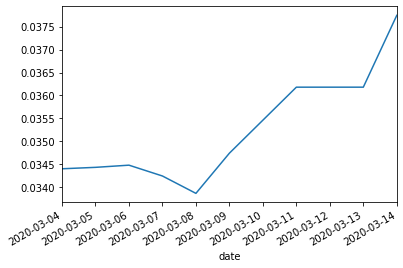

In [9]:
deces = chiffre_france[chiffre_france["maille_nom"] == "Monde"][[
    "date", "cas_confirmes", "deces"
]]
deces.set_index("date", inplace=True)

deces["ratio"] = deces.deces / deces.cas_confirmes
deces.ratio.plot()

In [10]:
deces

,cas_confirmes,deces,ratio
date,,,
2020-03-04,93076.0,3202.0,0.034402
2020-03-05,95315.0,3282.0,0.034433
2020-03-06,98171.0,3385.0,0.034481
2020-03-07,101855.0,3488.0,0.034245
2020-03-08,105828.0,3584.0,0.033866
2020-03-09,109695.0,3811.0,0.034742
2020-03-11,118628.0,4292.0,0.036180
2020-03-12,118628.0,4292.0,0.036180
2020-03-13,118628.0,4292.0,0.036180


## Patient analysis for death

In [11]:
patient_list = pd.read_csv("Data/COVID19_line_list_data.csv")
patient_list["death"].fillna("0", inplace=True)

In [12]:
def is_dead(x):
    if "Death" in str(x).split() or "death" in str(x).split():
        return 1
    return 0


patient_list["is_dead"] = patient_list["summary"].apply(is_dead)

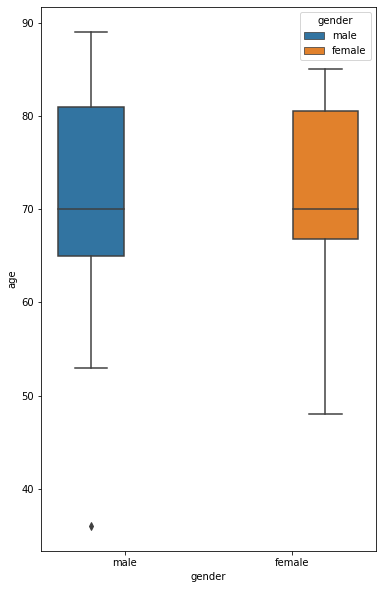

In [13]:
plt.figure(figsize=(6, 10))
sns.boxplot(x="gender",
            y="age",
            hue="gender",
            data=patient_list[patient_list["is_dead"] == 1])

# Recovered data

In [14]:
import pandas as pd
import io
import requests

url_confirmed="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_recovered="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
url_deaths="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

confirmed = pd.read_csv(url_confirmed)
recovered = pd.read_csv(url_recovered)
deaths = pd.read_csv(url_deaths)

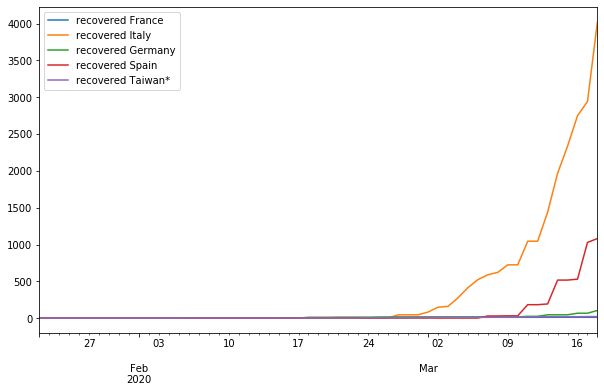

In [25]:
countries =['France','Italy','Germany','Spain','Taiwan*']

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for l in countries:
    r = recovered[recovered['Country/Region'] == l].iloc[0][4:]
    r.index=pd.to_datetime(r.index)
    r.name ='recovered '+l
    c = confirmed[confirmed['Country/Region'] == l].iloc[0][4:]
    c.index=pd.to_datetime(c.index)
    c.name ='confirmed '+l
    d = deaths[deaths['Country/Region'] == l].iloc[0][4:]
    d.index=pd.to_datetime(d.index)
    d.name='deaths '+l
    
    l_data = pd.DataFrame([r]).transpose()
    l_data.plot(ax=ax)